<a href="https://colab.research.google.com/github/MauricioTellezNava/viropolitica_poblacionCDMX/blob/main/finetuning_it2_preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Este cuaderno tiene como propósito explorar la posibilidad de obtener una mayor comprensión de la viropolítica orgánica, mediante la aplicaci'on de una segunda iteración al algoritmo kmeans

#Requerimientos ideales

- Eliminar las columnas dummy innecesarias
- Eliminar los outliers al dataset original (antes de implementar k-means)
- Disponer las filas según un órden específico


Antes de aplicar un modelo de machine learning en Python, es importante identificar cuáles son las variables más relevantes. Una forma de hacerlo con variables dummy es utilizar técnicas de selección de características. A continuación, se detallan dos de las técnicas más comunes:

* Selección univariada de características: Esta técnica se basa en evaluar cada variable independientemente en relación con la variable de salida (o target). Se pueden utilizar diferentes métricas de evaluación, como la prueba F, el test chi-cuadrado o la correlación de Pearson. Luego, se seleccionan las variables que obtienen los valores más altos en las métricas de evaluación. En Python, se pueden utilizar funciones como SelectKBest o SelectPercentile de la librería scikit-learn.

* Selección recursiva de características: Esta técnica se basa en seleccionar de forma iterativa las características más relevantes. En cada iteración, se entrena un modelo con las características actuales y se evalúa su rendimiento. Luego, se eliminan las características menos relevantes y se repite el proceso hasta que se alcanza un número determinado de características o se obtiene el mejor rendimiento posible. En Python, se pueden utilizar funciones como RFE o RFECV de la librería scikit-learn.

Es importante tener en cuenta que, aunque estas técnicas son útiles para seleccionar las variables más relevantes, no garantizan que el modelo resultante sea el mejor posible. Por lo tanto, es recomendable probar diferentes técnicas y modelos para obtener el mejor rendimiento posible.

# maquetando_v1 y maquetando_v2

## Resumen de maquetando_v1

* Se identificaron y eliminaron variables irrelevantes
* Se creó un nuevo dataset con el resto de variables categóricas convertidas en variables dummy
* Se implementó k-means, optando por usar cuatro clústeres (1 más de lo necesario).
* Se creó la columna "cluster", con el número de cada uno de los clústeres. 

En maquetando_v1 se implemento el modelo k-means y se clusterizaron los datos una vez preprocesados. Cabe aclarar que en este preprocesamiento no se incluyó la eliminación de variables no significativas, ni se eliminaron tampoco los outliers, lo cuál puede haber restado precisión al modelo.

El output de este notebook fue un dataframe llamado "X.csv", que después sería analizado en la libreta maquetando_v2.

## Resumen de maquetando_v2

* Se creó una columna de tipo string llamada nombre_cluster  
* Se creó una tabla pivote "X_pivot", en la que se incluyeron algunas variables relevantes para el análisis de la viropolítica.

Este cuaderno únicamente se usó para desarrollar tablas o 

# Notas

## Semilla

Es posible agregar una semilla a una implementación de k-means en Python para asegurarse de que los resultados sean reproducibles.

La semilla (seed en inglés) es un valor numérico que se utiliza para inicializar el generador de números aleatorios y garantizar que los mismos valores aleatorios se generen en cada ejecución del código. En el caso de k-means, la inicialización aleatoria de los centroides puede dar lugar a diferentes soluciones, por lo que establecer una semilla puede ser útil para obtener resultados reproducibles.

En Python, se puede establecer la semilla utilizando la función random.seed() del módulo random. Por ejemplo, si se quiere establecer la semilla como 42, se puede utilizar la siguiente línea de código al comienzo del programa:


```
import random

random.seed(42)
```

Luego, para establecer la semilla en la implementación de k-means de la librería scikit-learn, se puede utilizar el parámetro random_state. Por ejemplo:

```
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
```

De esta forma, se establece la semilla como 42 y se garantiza que los resultados serán los mismos en cada ejecución del código.

# Implementando nuevamente un preprocesamiento de los datos, k-means y un modelo predictivo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Preprocesamiento de los datos para la iteración 2

**Tareas asignadas:**

* Identificar y eliminar variables irrelevantes
* Crear un nuevo dataset con el resto de variables categóricas convertidas en variables dummy.
* Determinar y eliminar las variables no significativas para el análisis

**El output esperado es un archivo .csv llamado "X.csv"**

In [3]:
# Dataset sucio
df = pd.read_csv("/content/drive/MyDrive/Análisis del COVID-19 para la Ciudad de México/población/covid_cdmx.csv")
df = df[sorted(df.columns)] # Ordenando alfabéticamente

In [4]:
print(df.shape)
df.head()

(1752242, 41)


,ASMA,CARDIOVASCULAR,CLASIFICACION_FINAL,DIABETES,EDAD,EMBARAZO,ENTIDAD_NAC,ENTIDAD_RES,ENTIDAD_UM,EPOC,...,RESULTADO_ANTIGENO,RESULTADO_LAB,SECTOR,SEXO,TABAQUISMO,TIPO_PACIENTE,TOMA_MUESTRA_ANTIGENO,TOMA_MUESTRA_LAB,UCI,Unnamed: 0
0,2,2,3,1,67,2,9,9,9,2,...,97,1,12,1,2,1,2,1,97,0
1,2,2,3,2,62,2,9,9,9,2,...,1,97,12,1,2,1,1,2,97,1
2,2,2,3,2,45,2,9,9,9,2,...,97,1,12,1,2,1,2,1,97,2
3,2,2,1,2,38,2,9,9,9,2,...,97,97,12,1,2,1,2,2,97,3
4,2,2,3,2,26,2,9,9,9,2,...,97,1,12,1,2,1,2,1,97,4


In [5]:
df.columns

Index(['ASMA', 'CARDIOVASCULAR', 'CLASIFICACION_FINAL', 'DIABETES', 'EDAD',
       'EMBARAZO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'ENTIDAD_UM', 'EPOC',
       'FECHA_ACTUALIZACION', 'FECHA_DEF', 'FECHA_INGRESO', 'FECHA_SINTOMAS',
       'HABLA_LENGUA_INDIG', 'HIPERTENSION', 'ID_REGISTRO', 'INDIGENA',
       'INMUSUPR', 'INTUBADO', 'MIGRANTE', 'MUNICIPIO_RES', 'NACIONALIDAD',
       'NEUMONIA', 'OBESIDAD', 'ORIGEN', 'OTRA_COM', 'OTRO_CASO',
       'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'RENAL_CRONICA',
       'RESULTADO_ANTIGENO', 'RESULTADO_LAB', 'SECTOR', 'SEXO', 'TABAQUISMO',
       'TIPO_PACIENTE', 'TOMA_MUESTRA_ANTIGENO', 'TOMA_MUESTRA_LAB', 'UCI',
       'Unnamed: 0'],
      dtype='object')

<Axes: >

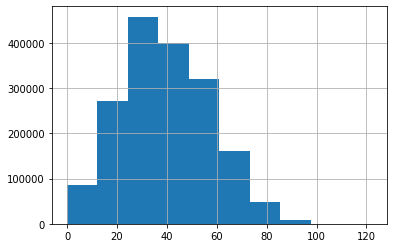

In [6]:
df.EDAD.hist()

### Resultados encontrados en maquetando_v1


#### Filas por eliminar
- NACIONALIDAD == 2

#### Columnas por modificar/ crear:
- FECHA_DEF

#### Columnas por eliminar:
- ENTIDAD_NAC
- ENTIDAD_UM
- ENTIDAD_RES
- FECHA_ACTUALIZACION
- FECHA_SINTOMAS
- FECHA_INGRESO
- ID_REGISTRO
- ORIGEN
- PAIS_NACIONALIDAD
- PAIS_ORIGEN
- CLASIFICACION_FINAL
- RESULTADO_ANTIGENO
- RESULTADO_LAB 
- TOMA_MUESTRA_ANTIGENO
- TOMA_MUESTRA_LAB



#### Eliminando NACIONALIDAD == 2

In [7]:
print("Total de extranjeros: ", df[df.NACIONALIDAD==2].shape[0], ",  Total de mexicanos: ", df[df.NACIONALIDAD==1].shape[0])

Total de extranjeros:  8671 ,  Total de mexicanos:  1743571


In [8]:
df = df[df["NACIONALIDAD"]==1]

#### Transofmando la variable "FECHA_DEF" a "defunciones", y eliminando la variable "FECHA_DEF"

In [9]:
# Se sabe que en los casos donde no hubo defunciones: df2["FECHA_DEF"] =  "9999-99-99"
df["defunciones"] = np.where(df["FECHA_DEF"]== "9999-99-99", 0, 1)

In [10]:
df["defunciones"].unique()

array([0, 1])

#### Creando la variable "sintomas_a_ingreso"

In [11]:
'''

# Convertimos las dos columnas al tipo datetime
df['FECHA_INGRESO'] = pd.to_datetime(df['FECHA_INGRESO'])
df['FECHA_SINTOMAS'] = pd.to_datetime(df['FECHA_SINTOMAS'])

# Creamos una nueva columna llamada 'DIFERENCIA' que es la diferencia en días entre las dos columnas
df['sintomas_a_ingreso'] = (df['FECHA_INGRESO'] - df['FECHA_SINTOMAS']).dt.days
'''

"\n\n# Convertimos las dos columnas al tipo datetime\ndf['FECHA_INGRESO'] = pd.to_datetime(df['FECHA_INGRESO'])\ndf['FECHA_SINTOMAS'] = pd.to_datetime(df['FECHA_SINTOMAS'])\n\n# Creamos una nueva columna llamada 'DIFERENCIA' que es la diferencia en días entre las dos columnas\ndf['sintomas_a_ingreso'] = (df['FECHA_INGRESO'] - df['FECHA_SINTOMAS']).dt.days\n"

In [12]:
len(df.columns)

42

#### Eliminando las siguientes 17 variables

"ENTIDAD_NAC", "ENTIDAD_UM", "ENTIDAD_RES", "FECHA_ACTUALIZACION", "FECHA_SINTOMAS", "FECHA_INGRESO", "FECHA_DEF", "ID_REGISTRO", "ORIGEN", "PAIS_NACIONALIDAD", "PAIS_ORIGEN", "CLASIFICACION_FINAL", "RESULTADO_ANTIGENO", "RESULTADO_LAB", "TOMA_MUESTRA_ANTIGENO", "TOMA_MUESTRA_LAB", "Unnamed: 0"






Para determinar los casos confirmados de COVID-19, sólo se tomó en cuenta la columna de "CLASIFICACION_FINAL". Los resultados para cada una de las columnas "RESULTADO_ANTIGENO", "RESULTADO_LAB", "TOMA_MUESTRA_ANTIGENO" y "TOMA_MUESTRA_LAB" no son concluyentes por sí mismos.

In [13]:
# Filas a eliminar

print("Filas y clumnas: ", df[["ENTIDAD_NAC", "ENTIDAD_UM", "ENTIDAD_RES", "FECHA_ACTUALIZACION", "FECHA_SINTOMAS", "FECHA_INGRESO", "FECHA_DEF", "ID_REGISTRO", "ORIGEN", "PAIS_NACIONALIDAD", 
   "PAIS_ORIGEN", "CLASIFICACION_FINAL", "RESULTADO_ANTIGENO", "RESULTADO_LAB", "TOMA_MUESTRA_ANTIGENO", "TOMA_MUESTRA_LAB", "Unnamed: 0"]].shape)
df[["ENTIDAD_NAC", "ENTIDAD_UM", "ENTIDAD_RES", "FECHA_ACTUALIZACION", "FECHA_SINTOMAS", "FECHA_INGRESO", "FECHA_DEF", "ID_REGISTRO", "ORIGEN", "PAIS_NACIONALIDAD", 
   "PAIS_ORIGEN", "CLASIFICACION_FINAL", "RESULTADO_ANTIGENO", "RESULTADO_LAB", "TOMA_MUESTRA_ANTIGENO", "TOMA_MUESTRA_LAB", "Unnamed: 0"]].head()

Filas y clumnas:  (1743571, 17)


,ENTIDAD_NAC,ENTIDAD_UM,ENTIDAD_RES,FECHA_ACTUALIZACION,FECHA_SINTOMAS,FECHA_INGRESO,FECHA_DEF,ID_REGISTRO,ORIGEN,PAIS_NACIONALIDAD,PAIS_ORIGEN,CLASIFICACION_FINAL,RESULTADO_ANTIGENO,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,TOMA_MUESTRA_LAB,Unnamed: 0
0,9,9,9,2021-10-31,2020-09-23,2020-09-23,9999-99-99,z13788,1,México,97,3,97,1,2,1,0
1,9,9,9,2021-10-31,2020-12-18,2020-12-21,9999-99-99,z526b3,2,México,97,3,1,97,1,2,1
2,9,9,9,2021-10-31,2020-04-20,2020-04-22,9999-99-99,z3d1e2,2,México,97,3,97,1,2,1,2
3,9,9,9,2021-10-31,2020-10-06,2020-10-07,9999-99-99,zz9079,2,México,97,1,97,97,2,2,3
4,9,9,9,2021-10-31,2020-09-03,2020-09-08,9999-99-99,z2770b,1,México,97,3,97,1,2,1,4


In [14]:
df2 = df.drop(columns=["ENTIDAD_NAC", "ENTIDAD_UM", "ENTIDAD_RES", "FECHA_ACTUALIZACION", "FECHA_SINTOMAS", "FECHA_INGRESO", "FECHA_DEF", "ID_REGISTRO", "ORIGEN", "PAIS_NACIONALIDAD", 
   "PAIS_ORIGEN", "CLASIFICACION_FINAL", "RESULTADO_ANTIGENO", "RESULTADO_LAB", "TOMA_MUESTRA_ANTIGENO", "TOMA_MUESTRA_LAB", "Unnamed: 0"])
df2 = df2[sorted(df2.columns)] # Ordenando alfabéticamente
print(df2.shape)
df2.head()

(1743571, 25)


,ASMA,CARDIOVASCULAR,DIABETES,EDAD,EMBARAZO,EPOC,HABLA_LENGUA_INDIG,HIPERTENSION,INDIGENA,INMUSUPR,...,OBESIDAD,OTRA_COM,OTRO_CASO,RENAL_CRONICA,SECTOR,SEXO,TABAQUISMO,TIPO_PACIENTE,UCI,defunciones
0,2,2,1,67,2,2,2,2,2,2,...,2,2,1,2,12,1,2,1,97,0
1,2,2,2,62,2,2,2,1,2,2,...,1,2,1,2,12,1,2,1,97,0
2,2,2,2,45,2,2,2,2,2,2,...,1,2,1,2,12,1,2,1,97,0
3,2,2,2,38,2,2,2,2,2,2,...,2,2,1,2,12,1,2,1,97,0
4,2,2,2,26,2,2,2,2,2,2,...,2,2,1,2,12,1,2,1,97,0


In [15]:
df2.columns

Index(['ASMA', 'CARDIOVASCULAR', 'DIABETES', 'EDAD', 'EMBARAZO', 'EPOC',
       'HABLA_LENGUA_INDIG', 'HIPERTENSION', 'INDIGENA', 'INMUSUPR',
       'INTUBADO', 'MIGRANTE', 'MUNICIPIO_RES', 'NACIONALIDAD', 'NEUMONIA',
       'OBESIDAD', 'OTRA_COM', 'OTRO_CASO', 'RENAL_CRONICA', 'SECTOR', 'SEXO',
       'TABAQUISMO', 'TIPO_PACIENTE', 'UCI', 'defunciones'],
      dtype='object')

In [16]:
df2.MUNICIPIO_RES.sort_values().unique()

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17, 106, 999])

####  Elimnando los valores 106 y 999 de MUNICIPIO_RES  (12 rows × 25 columns)

In [17]:
# Elimnando los valores 106 y 999 de MUNICIPIO_RES  (12 rows × 25 columns)
df2[df2["MUNICIPIO_RES"].isin([106, 999])]

,ASMA,CARDIOVASCULAR,DIABETES,EDAD,EMBARAZO,EPOC,HABLA_LENGUA_INDIG,HIPERTENSION,INDIGENA,INMUSUPR,...,OBESIDAD,OTRA_COM,OTRO_CASO,RENAL_CRONICA,SECTOR,SEXO,TABAQUISMO,TIPO_PACIENTE,UCI,defunciones
19885,2,2,2,26,2,2,2,2,2,2,...,2,2,1,2,12,1,2,1,97,0
20280,2,2,2,25,97,2,2,2,2,2,...,2,2,2,2,11,2,2,1,97,0
20655,2,2,2,30,2,2,2,2,2,2,...,2,2,1,2,12,1,2,1,97,0
268259,2,2,2,34,97,2,2,2,2,2,...,2,2,2,2,4,2,2,1,97,0
817996,2,2,2,34,2,2,2,2,2,2,...,2,2,2,2,4,1,2,1,97,0
868213,2,2,2,22,2,2,2,2,2,2,...,2,2,2,2,4,1,2,1,97,0
979611,2,1,2,79,2,2,2,1,2,2,...,1,1,2,2,4,1,2,2,2,0
979829,2,2,2,41,2,2,2,2,2,2,...,2,2,2,2,4,1,2,1,97,0
1004086,2,2,1,56,2,2,2,1,2,2,...,1,2,1,2,4,1,2,1,97,0
1114409,2,2,2,41,2,2,2,2,2,2,...,2,2,2,2,4,1,2,1,97,0


In [18]:
mask = ~df2["MUNICIPIO_RES"].isin([106, 999])
df2 = df2[mask]

In [19]:
df2.columns

Index(['ASMA', 'CARDIOVASCULAR', 'DIABETES', 'EDAD', 'EMBARAZO', 'EPOC',
       'HABLA_LENGUA_INDIG', 'HIPERTENSION', 'INDIGENA', 'INMUSUPR',
       'INTUBADO', 'MIGRANTE', 'MUNICIPIO_RES', 'NACIONALIDAD', 'NEUMONIA',
       'OBESIDAD', 'OTRA_COM', 'OTRO_CASO', 'RENAL_CRONICA', 'SECTOR', 'SEXO',
       'TABAQUISMO', 'TIPO_PACIENTE', 'UCI', 'defunciones'],
      dtype='object')

#### Eliminando las columnas NACIONALIDAD y MIGRANTE

In [20]:
df2 = df2.drop(columns=["NACIONALIDAD", "MIGRANTE"])
df2.columns

Index(['ASMA', 'CARDIOVASCULAR', 'DIABETES', 'EDAD', 'EMBARAZO', 'EPOC',
       'HABLA_LENGUA_INDIG', 'HIPERTENSION', 'INDIGENA', 'INMUSUPR',
       'INTUBADO', 'MUNICIPIO_RES', 'NEUMONIA', 'OBESIDAD', 'OTRA_COM',
       'OTRO_CASO', 'RENAL_CRONICA', 'SECTOR', 'SEXO', 'TABAQUISMO',
       'TIPO_PACIENTE', 'UCI', 'defunciones'],
      dtype='object')

#### Eliminando los outliers en la columna EDAD. (files: 1668642, columnas: 23)


<Axes: >

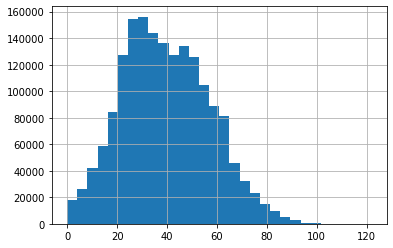

In [21]:
df2["EDAD"].hist(bins=30)

In [22]:
# Filtrando el 5% de la muestra

lower = df2['EDAD'].quantile(0.025)
upper = df2['EDAD'].quantile(0.975)

df2 = df2[(df2['EDAD'] >= lower) & (df2['EDAD'] <= upper)]
print(df2.shape)
df2.head()

(1668642, 23)


,ASMA,CARDIOVASCULAR,DIABETES,EDAD,EMBARAZO,EPOC,HABLA_LENGUA_INDIG,HIPERTENSION,INDIGENA,INMUSUPR,...,OBESIDAD,OTRA_COM,OTRO_CASO,RENAL_CRONICA,SECTOR,SEXO,TABAQUISMO,TIPO_PACIENTE,UCI,defunciones
0,2,2,1,67,2,2,2,2,2,2,...,2,2,1,2,12,1,2,1,97,0
1,2,2,2,62,2,2,2,1,2,2,...,1,2,1,2,12,1,2,1,97,0
2,2,2,2,45,2,2,2,2,2,2,...,1,2,1,2,12,1,2,1,97,0
3,2,2,2,38,2,2,2,2,2,2,...,2,2,1,2,12,1,2,1,97,0
4,2,2,2,26,2,2,2,2,2,2,...,2,2,1,2,12,1,2,1,97,0


<Axes: >

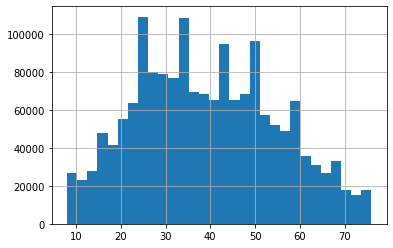

In [23]:
df2["EDAD"].hist(bins=30)

In [24]:
df2["EDAD"].describe().round(2)

count    1668642.00
mean          39.31
std           15.69
min            8.00
25%           27.00
50%           38.00
75%           51.00
max           76.00
Name: EDAD, dtype: float64

### Convirtiendo todas las variables dummies (menos "defunciones"). Obteniendo y uniendo 23 dataframes

In [25]:
df3 = df2.copy()

In [26]:
print(len(df3.columns))
df3.columns

23


Index(['ASMA', 'CARDIOVASCULAR', 'DIABETES', 'EDAD', 'EMBARAZO', 'EPOC',
       'HABLA_LENGUA_INDIG', 'HIPERTENSION', 'INDIGENA', 'INMUSUPR',
       'INTUBADO', 'MUNICIPIO_RES', 'NEUMONIA', 'OBESIDAD', 'OTRA_COM',
       'OTRO_CASO', 'RENAL_CRONICA', 'SECTOR', 'SEXO', 'TABAQUISMO',
       'TIPO_PACIENTE', 'UCI', 'defunciones'],
      dtype='object')

In [27]:

#'ASMA' 
asma = pd.get_dummies(df3["ASMA"], prefix="asma")
asma = asma.rename({"asma_1" : "asma_si", "asma_2" : "asma_no", "asma_98" : "asma_seIgn"}, axis="columns")

#'CARDIOVASCULAR'
cardio = pd.get_dummies(df3["CARDIOVASCULAR"], prefix="cardio")
cardio = cardio.rename({"cardio_1":"cardio_si", "cardio_2":"cardio_no", "cardio_98":"cardio_seIgn"}, axis="columns")

#'DIABETES' 
diabetes = pd.get_dummies(df3["DIABETES"], prefix = "diabetes")
diabetes = diabetes.rename({"diabetes_1":"diabetes_si", "diabetes_2":"diabetes_no", "diabetes_98":"diabetes_seIgn"}, axis="columns")

#'EDAD'
edad = df3[["EDAD"]]

#'EMBARAZO' 
embarazo =  pd.get_dummies(df3["EMBARAZO"], prefix="embarazo")
embarazo = embarazo.rename({"embarazo_1":"embarazo_si", "embarazo_2":"embarazo_no", "embarazo_97":"embarazo_noAplica", "embarazo_98":"embarazo_seIgn"}, axis = "columns")

#'EPOC'   
epoc = pd.get_dummies(df3["EPOC"], prefix="epoc")
epoc = epoc.rename({"epoc_1" : "epoc_si", "epoc_2" : "epoc_no", "epoc_98" : "epoc_seIgn"}, axis="columns")  

#'HABLA_LENGUA_INDIG'
leng_ind = pd.get_dummies(df3["HABLA_LENGUA_INDIG"], prefix="leng_ind")
leng_ind = leng_ind.rename({"leng_ind_1" : "leng_ind_si", "leng_ind_2" : "leng_ind_no", "leng_ind_99" : "leng_ind_noEsp"}, axis = "columns")

#'HIPERTENSION'
hipertension = pd.get_dummies(df3["HIPERTENSION"], prefix="hipert")
hipertension = hipertension.rename({"hipert_1":"hipert_si", "hipert_2":"hipert_no", "hipert_98":"hipert_seIgn"}, axis="columns")

#'INDIGENA'
indigena = pd.get_dummies(df3["INDIGENA"], prefix="indigena")
indigena = indigena.rename({"indigena_1":"indigena_si", "indigena_2":"indigena_no", "indigena_99":"indigena_noEsp"}, axis = "columns")

#'INMUSUPR'
inmusupr = pd.get_dummies(df3["INMUSUPR"], prefix = "inmusupr")
inmusupr = inmusupr.rename({"inmusupr_1":"inmusupr_si", "inmusupr_2":"inmusupr_no", "inmusupr_98":"inmusupr_seIgn"}, axis="columns")

#'INTUBADO' 
intubado = pd.get_dummies(df3["INTUBADO"], prefix="intub")
intubado = intubado.rename({"intub_1" : "intub_si", "intub_2" : "intub_no", "intub_97" : "intub_noAplica", "intub_99" : "intub_noEsp"}, axis="columns")

#'MUNICIPIO_RES' 
alcaldias = pd.get_dummies(df3["MUNICIPIO_RES"], prefix = "alc")
alcaldias = alcaldias.rename({"alc_2" : "alc_azcap", "alc_3" : "alc_coyo", "alc_4" : "alc_cuaj", "alc_5" : "alc_gam", "alc_6" : "alc_iztac", "alc_7" : "alc_iztap", "alc_8" : "alc_magdC", "alc_9" : "alc_milpa", "alc_10" : "alc_alv", 
                              "alc_11" : "alc_tlah", "alc_12" : "alc_tlalp", "alc_13" : "alc_xoch", "alc_14" : "alc_beniJ", 
                              "alc_15" : "alc_cuauh", "alc_16" : "alc_migH", "alc_17" : "venusC", "alc_999" : "alc_noEsp"}, axis = "columns")
#'NEUMONIA'
neumonia = pd.get_dummies(df3["NEUMONIA"], prefix="neumonia")
neumonia = neumonia.rename({"neumonia_1" : "neumonia_si", "neumonia_2" : "neumonia_no", "neumonia_99" : "neumonia_noEsp"}, axis = "columns")

#'OBESIDAD'
obesidad = pd.get_dummies(df3["OBESIDAD"], prefix="obesidad")
obesidad = obesidad.rename({"obesidad_1":"obesidad_si", "obesidad_2":"obesidad_no", "obesidad_98":"obesidad_seIgn"}, axis="columns")

#'OTRA_COM'
otra_com = pd.get_dummies(df3["OTRA_COM"], prefix = "otr_com")
otra_com = otra_com.rename({"otr_com_1":"otr_com_si", "otr_com_2":"otr_com_no", "otr_com_98":"otr_com_seIgn"}, axis="columns")

#'OTRO_CASO'
otro_caso = pd.get_dummies(df3["OTRO_CASO"], prefix="otr_caso")
otro_caso = otro_caso.rename({"otr_caso_1":"otr_caso_si", "otr_caso_2":"otr_caso_no", "otr_caso_99":"otr_caso_seIgn"}, axis="columns")

#'RENAL_CRONICA'
renal_cronica = pd.get_dummies(df3["RENAL_CRONICA"], prefix="renalCr")
renal_cronica = renal_cronica.rename({"renalCr_1":"renalCr_si", "renalCr_2":"renalCr_no", "renalCr_98":"renalCr_seIgn"}, axis="columns")

#'SECTOR'
sector = pd.get_dummies(df3["SECTOR"], prefix = "inst")

#'SEXO'
sexo = pd.get_dummies(df3["SEXO"], prefix = "sex")
sexo = sexo.rename({"sex_1":"sex_M", "sex_2":"sex_H"}, axis="columns")

#'TABAQUISMO'
tabaquismo = pd.get_dummies(df3["TABAQUISMO"], prefix="tabaq")
tabaquismo = tabaquismo.rename({"tabaq_1":"tabaq_si", "tabaq_2":"tabaq_no", "tabaq_98":"tabaq_seIgn"}, axis="columns")

#'TIPO_PACIENTE'
tipo_paciente = pd.get_dummies(df3["TIPO_PACIENTE"], prefix = "paciente")
tipo_paciente = tipo_paciente.rename({"paciente_1" : "paciente_amb", "paciente_2" : "paciente_hosp"}, axis = "columns")

#'UCI'
uci = pd.get_dummies(df3["UCI"], prefix="uci")
uci = uci.rename({"uci_1":"uci_si", "uci_2":"uci_no", "uci_97":"uci_noAplica", "uci_99":"uci_noEsp"}, axis="columns")

#'defunciones'
defunciones = df3[["defunciones"]]


### Concatenando todos los dataframes en la columna X

In [28]:
X = pd.concat([asma, cardio, diabetes, edad, embarazo, epoc, leng_ind, hipertension, indigena, inmusupr, intubado, alcaldias, neumonia, obesidad, otra_com, otro_caso, renal_cronica,
              sector, sexo, tabaquismo, tipo_paciente, uci, defunciones], axis=1)
print(X.shape)
X.head()

(1668642, 90)


,asma_si,asma_no,asma_seIgn,cardio_si,cardio_no,cardio_seIgn,diabetes_si,diabetes_no,diabetes_seIgn,EDAD,...,tabaq_si,tabaq_no,tabaq_seIgn,paciente_amb,paciente_hosp,uci_si,uci_no,uci_noAplica,uci_noEsp,defunciones
0,0,1,0,0,1,0,1,0,0,67,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,1,0,0,1,0,62,...,0,1,0,1,0,0,0,1,0,0
2,0,1,0,0,1,0,0,1,0,45,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,1,0,0,1,0,38,...,0,1,0,1,0,0,0,1,0,0
4,0,1,0,0,1,0,0,1,0,26,...,0,1,0,1,0,0,0,1,0,0


In [29]:
X.columns

Index(['asma_si', 'asma_no', 'asma_seIgn', 'cardio_si', 'cardio_no',
       'cardio_seIgn', 'diabetes_si', 'diabetes_no', 'diabetes_seIgn', 'EDAD',
       'embarazo_si', 'embarazo_no', 'embarazo_noAplica', 'embarazo_seIgn',
       'epoc_si', 'epoc_no', 'epoc_seIgn', 'leng_ind_si', 'leng_ind_no',
       'leng_ind_noEsp', 'hipert_si', 'hipert_no', 'hipert_seIgn',
       'indigena_si', 'indigena_no', 'indigena_noEsp', 'inmusupr_si',
       'inmusupr_no', 'inmusupr_seIgn', 'intub_si', 'intub_no',
       'intub_noAplica', 'intub_noEsp', 'alc_azcap', 'alc_coyo', 'alc_cuaj',
       'alc_gam', 'alc_iztac', 'alc_iztap', 'alc_magdC', 'alc_milpa',
       'alc_alv', 'alc_tlah', 'alc_tlalp', 'alc_xoch', 'alc_beniJ',
       'alc_cuauh', 'alc_migH', 'venusC', 'neumonia_si', 'neumonia_no',
       'neumonia_noEsp', 'obesidad_si', 'obesidad_no', 'obesidad_seIgn',
       'otr_com_si', 'otr_com_no', 'otr_com_seIgn', 'otr_caso_si',
       'otr_caso_no', 'otr_caso_seIgn', 'renalCr_si', 'renalCr_no',
       

In [30]:
X2 = X[["asma_si", "cardio_si", "diabetes_si", "EDAD", "embarazo_si", "epoc_si", "leng_ind_si", "hipert_si", "indigena_si", "inmusupr_si", "intub_si", 'alc_azcap', 'alc_coyo', 'alc_cuaj',
       'alc_gam', 'alc_iztac', 'alc_iztap', 'alc_magdC', 'alc_milpa',
       'alc_alv', 'alc_tlah', 'alc_tlalp', 'alc_xoch', 'alc_beniJ',
       'alc_cuauh', 'alc_migH', 'venusC', "neumonia_si", "obesidad_si", "otr_com_si", "otr_caso_si", "renalCr_si", 'sex_M', 'sex_H', "tabaq_si", "paciente_hosp", "uci_si", "defunciones"]]

In [31]:
X2.shape

(1668642, 38)

In [32]:
# X2.corr().to_csv('/content/drive/MyDrive/Análisis del COVID-19 para la Ciudad de México/población parte 2/X2_corr.csv', index=False)

## Implementando K-Means

### Definiendo un número óptimo de clusteres

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

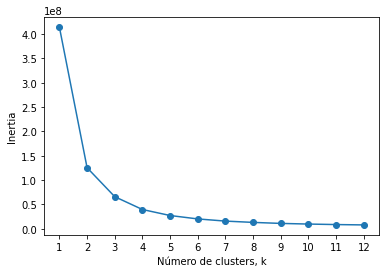

In [34]:
from sklearn.cluster import KMeans
inertias = {k: KMeans(n_clusters=k).fit(X2).inertia_ for k in range(1, 13)}

plt.plot(list(inertias.keys()), 
         list(inertias.values()), '-o')
plt.xlabel('Número de clusters, k')
plt.ylabel('Inertia')
plt.xticks(list(inertias.keys()))
plt.show()


### Implementando K-Means con 4 clusteres

In [46]:
# Implementando kmeans 

k = 4
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X2)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
y_pred
y_pred is kmeans.labels_

True

In [48]:
X2.columns

Index(['asma_si', 'cardio_si', 'diabetes_si', 'EDAD', 'embarazo_si', 'epoc_si',
       'leng_ind_si', 'hipert_si', 'indigena_si', 'inmusupr_si', 'intub_si',
       'alc_azcap', 'alc_coyo', 'alc_cuaj', 'alc_gam', 'alc_iztac',
       'alc_iztap', 'alc_magdC', 'alc_milpa', 'alc_alv', 'alc_tlah',
       'alc_tlalp', 'alc_xoch', 'alc_beniJ', 'alc_cuauh', 'alc_migH', 'venusC',
       'neumonia_si', 'obesidad_si', 'otr_com_si', 'otr_caso_si', 'renalCr_si',
       'sex_M', 'sex_H', 'tabaq_si', 'paciente_hosp', 'uci_si', 'defunciones'],
      dtype='object')

In [49]:
# Coordenadas de los centroides
pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.017973,0.007632,0.087375,46.827103,0.001018,0.003525,0.002294,0.106569,0.003135,0.005644,...,0.103654,0.010303,0.433085,0.005912,0.564625,0.435375,0.079743,0.048896,0.003192,0.017628
1,0.022230,0.002597,0.004604,19.544662,0.011086,0.000744,0.001734,0.005632,0.002298,0.002043,...,0.037040,0.004682,0.461197,0.001665,0.523950,0.476050,0.058554,0.008636,0.000415,0.000764
2,0.014085,0.022294,0.210755,62.670197,0.000101,0.015021,0.002706,0.274733,0.003743,0.010289,...,0.099803,0.016529,0.401429,0.015052,0.545653,0.454347,0.064353,0.138139,0.009214,0.075486
3,0.020026,0.003492,0.018562,32.776576,0.010110,0.001100,0.002152,0.025203,0.002841,0.003034,...,0.078154,0.007314,0.439349,0.003158,0.540878,0.459122,0.097401,0.020786,0.001218,0.004326


In [50]:
X2["cluster"] = y_pred
X2.head()

<ipython-input-50-bda1e1f8c60c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2["cluster"] = y_pred


,asma_si,cardio_si,diabetes_si,EDAD,embarazo_si,epoc_si,leng_ind_si,hipert_si,indigena_si,inmusupr_si,...,otr_com_si,otr_caso_si,renalCr_si,sex_M,sex_H,tabaq_si,paciente_hosp,uci_si,defunciones,cluster
0,0,0,1,67,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,2
1,0,0,0,62,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,2
2,0,0,0,45,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,38,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,3
4,0,0,0,26,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


## Exportando el dataframe X2



In [66]:
# X2.to_csv("/content/drive/MyDrive/Análisis del COVID-19 para la Ciudad de México/población parte 2/X2.csv")

### Tabla pivote

In [52]:
X_pivot = pd.pivot_table(X2, index='cluster')
X_pivot["cluster"] = X_pivot.index
X_pivot

,EDAD,alc_alv,alc_azcap,alc_beniJ,alc_coyo,alc_cuaj,alc_cuauh,alc_gam,alc_iztac,alc_iztap,...,otr_caso_si,otr_com_si,paciente_hosp,renalCr_si,sex_H,sex_M,tabaq_si,uci_si,venusC,cluster
cluster,,,,,,,,,,,,,,,,,,,,,
0,46.827103,0.125125,0.055685,0.039615,0.061040,0.016420,0.054431,0.125167,0.043242,0.149781,...,0.433085,0.010303,0.048896,0.005912,0.435375,0.564625,0.079743,0.003192,0.046113,0
1,19.544662,0.144312,0.052988,0.030330,0.056013,0.019074,0.046331,0.118191,0.037840,0.146352,...,0.461197,0.004682,0.008636,0.001665,0.476050,0.523950,0.058554,0.000415,0.042307,1
2,62.670197,0.122199,0.058714,0.045982,0.063968,0.014727,0.060307,0.130714,0.045005,0.144313,...,0.401429,0.016529,0.138139,0.015052,0.454347,0.545653,0.064353,0.009214,0.050303,2
3,32.776576,0.125986,0.054602,0.043118,0.060125,0.017284,0.057994,0.120840,0.041025,0.148791,...,0.439349,0.007314,0.020786,0.003158,0.459122,0.540878,0.097401,0.001218,0.042992,3


In [53]:
X_pivot.columns

Index(['EDAD', 'alc_alv', 'alc_azcap', 'alc_beniJ', 'alc_coyo', 'alc_cuaj',
       'alc_cuauh', 'alc_gam', 'alc_iztac', 'alc_iztap', 'alc_magdC',
       'alc_migH', 'alc_milpa', 'alc_tlah', 'alc_tlalp', 'alc_xoch', 'asma_si',
       'cardio_si', 'defunciones', 'diabetes_si', 'embarazo_si', 'epoc_si',
       'hipert_si', 'indigena_si', 'inmusupr_si', 'intub_si', 'leng_ind_si',
       'neumonia_si', 'obesidad_si', 'otr_caso_si', 'otr_com_si',
       'paciente_hosp', 'renalCr_si', 'sex_H', 'sex_M', 'tabaq_si', 'uci_si',
       'venusC', 'cluster'],
      dtype='object')

In [65]:
 matriz = X_pivot.sort_values(by='EDAD', ascending=True)[["EDAD", "intub_si", "paciente_hosp", "uci_si", "defunciones"]]
 matriz["intub_si"] = matriz["intub_si"]*100
 matriz["paciente_hosp"] = matriz["paciente_hosp"]*100
 matriz["uci_si"] = matriz["uci_si"]*100
 matriz["defunciones"] = matriz["defunciones"]*100
 matriz.round(2)

,EDAD,intub_si,paciente_hosp,uci_si,defunciones
cluster,,,,,
1,19.54,0.05,0.86,0.04,0.08
3,32.78,0.21,2.08,0.12,0.43
0,46.83,0.74,4.89,0.32,1.76
2,62.67,2.45,13.81,0.92,7.55
